### Rain in Australia
Importacions de les llibrerias utilitzades

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import ipywidgets as widgets
import plotly.express as px

from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_recall_curve, average_precision_score, \
    roc_auc_score, roc_curve, auc, recall_score, precision_score
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import PolynomialFeatures

import seaborn as sns
import scipy.stats
from scipy import stats
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from xgboost import XGBClassifier

pd.set_option("display.max_columns", None)


In [2]:
database = pd.read_csv('../../data/weatherAUS.csv')

database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [3]:
database.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
database.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(database.isnull(), yticklabels = False, cbar=False, cmap='gray')

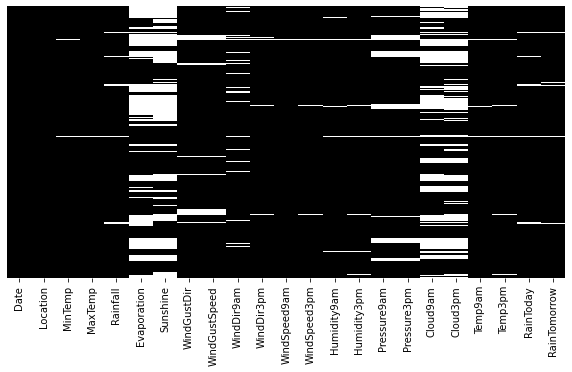

In [5]:
# Checking data for NaN
missing = pd.DataFrame(database.isnull().sum().sort_values(ascending=False), columns=['No. of missing values'])
missing['% missing_values'] = (missing/len(database)).round(2)*100
missing

,No. of missing values,% missing_values
Sunshine,69835,48.0
Evaporation,62790,43.0
Cloud3pm,59358,41.0
Cloud9am,55888,38.0
Pressure9am,15065,10.0
Pressure3pm,15028,10.0
WindDir9am,10566,7.0
WindGustDir,10326,7.0
WindGustSpeed,10263,7.0
Humidity3pm,4507,3.0


<AxesSubplot:>

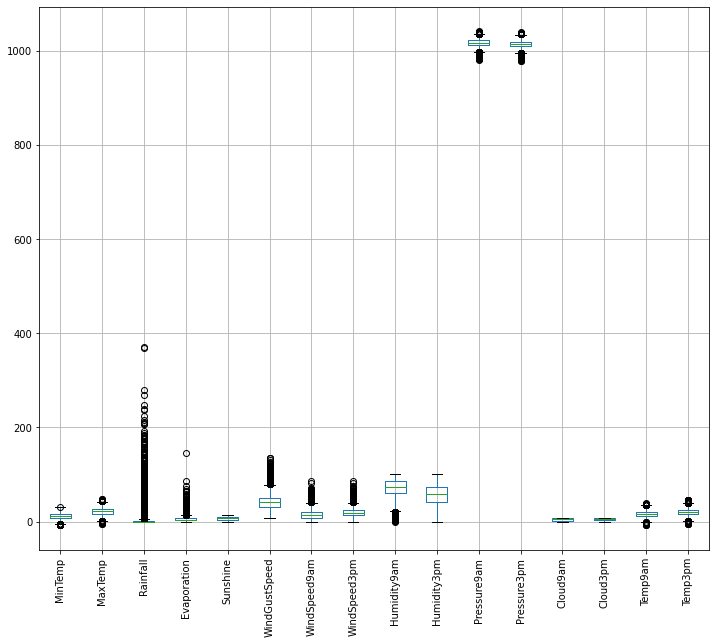

In [40]:
# num_col = [num_col for num_col in database.columns if database[num_col].dtype !="O"] 
# num_col_with_null_values = [col for col in num_col if database[col].isnull().sum()]
continuous_cols = list(database.select_dtypes(include=['float64']).columns)
plt.figure(figsize=(12,10))
database.boxplot(continuous_cols,rot = 90)

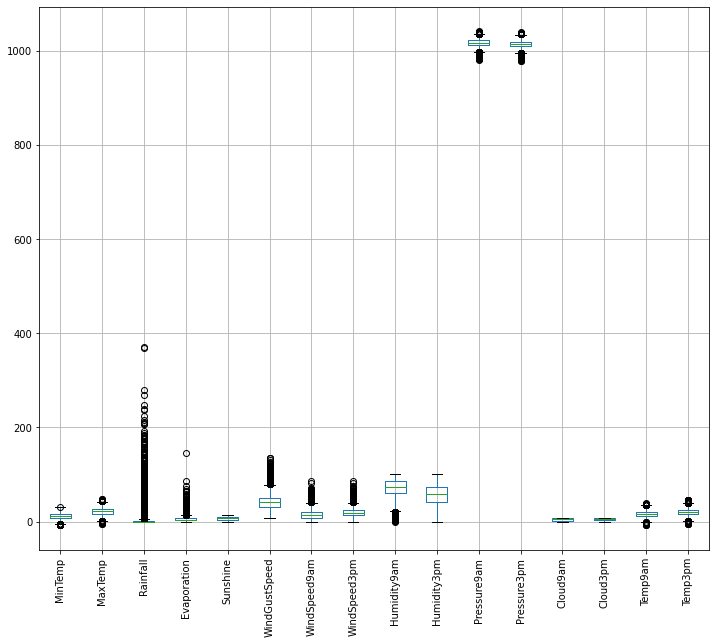

In [6]:
database.duplicated().sum()

0

In [7]:
database['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [8]:
targetNulls = widgets.ToggleButtons(
    options=['No', 'Yes', 'Delete'],
    description='Optios:',
    disabled=False,
    tooltips=['No', 'Yes', 'Delete']
)
display(targetNulls)
    
def changeValues(obj):
    database = pd.read_csv('../../data/weatherAUS.csv')
    if(targetNulls.value == 'No'):
        database['RainTomorrow'] = [1 if i=='Yes' else 0 for i in database['RainTomorrow'] ]
    elif(targetNulls.value == 'Yes'):
        database['RainTomorrow']=[0 if i=='No' else 1 for i in database['RainTomorrow'] ]
    else:
        database = database.dropna(axis=0, subset=['RainTomorrow'])
    print("Opcio escollida:", targetNulls.value)
    print(database['RainTomorrow'].value_counts())
    print("--------------------------------------")
    
        
targetNulls.observe(changeValues, 'value')
cols_to_drop=['Date']
database.drop(columns=cols_to_drop,inplace=True)

ToggleButtons(description='Optios:', options=('No', 'Yes', 'Delete'), tooltips=('No', 'Yes', 'Delete'), value=…

Opcio escollida: Yes
0    110316
1     35144
Name: RainTomorrow, dtype: int64
--------------------------------------


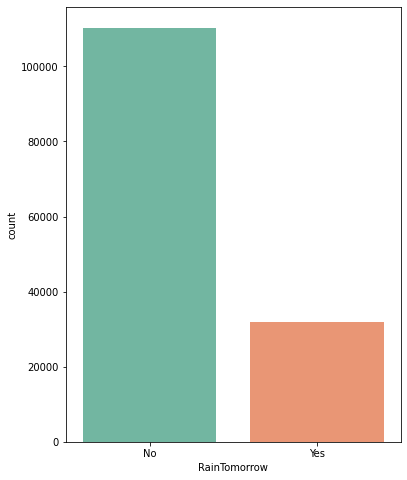

In [9]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=database, palette="Set2")
plt.show()

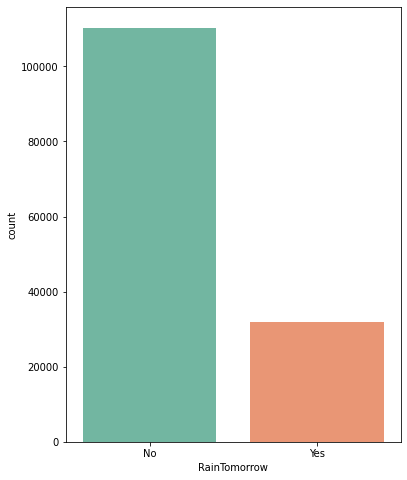

In [53]:
balance = widgets.ToggleButtons(
    options=['Oversampling', 'Oversampling Smote' ,'Subsampling','None'],
    description='Optios:',
    disabled=False,
    tooltips=['Oversampling', 'Oversampling Smote' ,'Subsampling', 'None']
)
print("Balanceig de les dades")
balance

Balanceig de les dades


ToggleButtons(description='Optios:', options=('Oversampling', 'Oversampling Smote', 'Subsampling', 'None'), to…

In [60]:
count_class_0, count_class_1 = database.RainTomorrow.value_counts()
if(balance.value == 'Oversampling'):
    df_class_0 = database[database['RainTomorrow'] == "No"]
    df_class_1 = database[database['RainTomorrow'] == "Yes"]
    
    df_class_1_over = df_class_1.sample(count_class_0, replace=True)
    database = pd.concat([df_class_0, df_class_1_over], axis=0)
    
elif(balance.value == 'Subsampling'):
    df_class_0 = database[database['RainTomorrow'] == "No"]
    df_class_1 = database[database['RainTomorrow'] == "Yes"]

    df_class_0_under = df_class_0.sample(count_class_1)
    database = pd.concat([df_class_0_under, df_class_1], axis=0)

In [64]:
if balance.value != 'Oversampling Smote' and balance.value != 'None':
    f, ax = plt.subplots(figsize=(6, 8))
    ax = sns.countplot(x="RainTomorrow", data=database, palette="Set2")
    plt.show()

In [13]:
x=database.drop(['RainTomorrow'],axis=1)
y=database['RainTomorrow']
print(x.shape,y.shape)

(63754, 21) (63754,)


In [17]:
categorical_cols = list(x.select_dtypes(include=['object']).columns)
continuous_cols = list(x.select_dtypes(include=['float64']).columns)

atributeNulls = widgets.ToggleButtons(
    options=['Mode', 'Median', 'Mean'],
    description='Optios:',
    disabled=False,
    tooltips=['Mode', 'Median', 'Mean']
)
display(atributeNulls)

ToggleButtons(description='Optios:', options=('Mode', 'Median', 'Mean'), tooltips=('Mode', 'Median', 'Mean'), …

In [20]:
x=database.drop(['RainTomorrow'],axis=1)
for i in categorical_cols:
    x[i].fillna(x[i].mode()[0], inplace=True)

if(targetNulls.value == 'Mode'):
    for column in continuous_cols:
        x[column].fillna(x[column].mode()[0], inplace = True)

elif(targetNulls.value == 'Median'):

    for column in continuous_cols:
        x[column].fillna(x[column].median(), inplace = True)
else:
    for column in continuous_cols:
        x[column].fillna(x[column].mean(), inplace = True)
print("Opcio escollida per als atribusc continues:", atributeNulls.value)
print("--------------------------------------")
    

Opcio escollida per als atribusc continues: Median
--------------------------------------


In [22]:
transformer = ColumnTransformer(transformers=[('ohe', OneHotEncoder(sparse='False',drop='first'), categorical_cols)],remainder='passthrough')
x=transformer.fit_transform(x)

In [23]:
transformer.named_transformers_['ohe'].get_feature_names()

array(['x0_Albany', 'x0_Albury', 'x0_AliceSprings', 'x0_BadgerysCreek',
       'x0_Ballarat', 'x0_Bendigo', 'x0_Brisbane', 'x0_Cairns',
       'x0_Canberra', 'x0_Cobar', 'x0_CoffsHarbour', 'x0_Dartmoor',
       'x0_Darwin', 'x0_GoldCoast', 'x0_Hobart', 'x0_Katherine',
       'x0_Launceston', 'x0_Melbourne', 'x0_MelbourneAirport',
       'x0_Mildura', 'x0_Moree', 'x0_MountGambier', 'x0_MountGinini',
       'x0_Newcastle', 'x0_Nhil', 'x0_NorahHead', 'x0_NorfolkIsland',
       'x0_Nuriootpa', 'x0_PearceRAAF', 'x0_Penrith', 'x0_Perth',
       'x0_PerthAirport', 'x0_Portland', 'x0_Richmond', 'x0_Sale',
       'x0_SalmonGums', 'x0_Sydney', 'x0_SydneyAirport', 'x0_Townsville',
       'x0_Tuggeranong', 'x0_Uluru', 'x0_WaggaWagga', 'x0_Walpole',
       'x0_Watsonia', 'x0_Williamtown', 'x0_Witchcliffe', 'x0_Wollongong',
       'x0_Woomera', 'x1_ENE', 'x1_ESE', 'x1_N', 'x1_NE', 'x1_NNE',
       'x1_NNW', 'x1_NW', 'x1_S', 'x1_SE', 'x1_SSE', 'x1_SSW', 'x1_SW',
       'x1_W', 'x1_WNW', 'x1_WSW', 'x2

In [ ]:
if balance.value != 'Oversampling Smote':
    


In [47]:
x=pd.DataFrame(x.toarray())
def check_skewness(x):
    
    skew_limit=0.75
    skew_value=x[x.columns].skew()
    skew_cols=skew_value[abs(skew_value)>skew_limit]
    #print(skew_cols)
    cols=skew_cols.index
    return cols
    
skewed_col=check_skewness(x)
print(skewed_col)

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
             13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
             26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
             39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
             52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
             65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
             78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
             91,  92,  93,  96,  97,  99, 100, 107],
           dtype='int64')


In [48]:
pt=PowerTransformer(standardize=False)
x[skewed_col]=pt.fit_transform(x[skewed_col])

In [49]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [50]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(51003, 110)
(12751, 110)
(51003,)
(12751,)


In [51]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [52]:
def evaluate(model):
    model.fit(X_train,y_train)
    accuracy=model.score(X_test,y_test)
    
    print('model name ',model)
    print('accuracy ',accuracy)

lr=LogisticRegression()
svm=SVC()
dt=DecisionTreeClassifier(max_depth=6)
rf=RandomForestClassifier(max_samples=0.9)
knn=KNeighborsClassifier(n_neighbors=5)

models=[lr,dt,rf,knn]

for model in models:
    evaluate(model)

LogisticRegression()
model name  LogisticRegression()
accuracy  0.795231746529684
DecisionTreeClassifier(max_depth=6)
model name  DecisionTreeClassifier(max_depth=6)
accuracy  0.7635479570229786
RandomForestClassifier(max_samples=0.9)
model name  RandomForestClassifier(max_samples=0.9)
accuracy  0.803387969571014
KNeighborsClassifier()
model name  KNeighborsClassifier()
accuracy  0.7156301466551643
